### LATIHAN

In [1]:
import numpy as np

X = np.array([[7,3], [1,10], [5,5], [2,1], [3,3], [2,7], [17,14],
                [6,8], [7,5], [3,6]])

y = np.array([1,1,1,2,2,2,1,2,1,2])

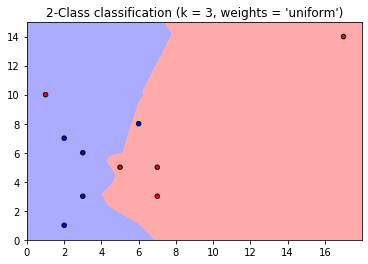

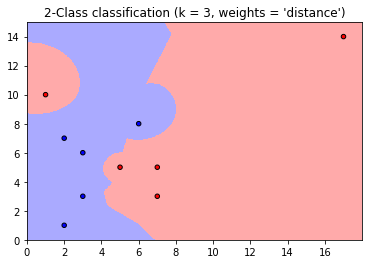

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

k_neighbors = 3
h = .02 #step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
for weight in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k_neighbors, weights=weight)
    clf.fit(X, y)
    
    #plot decision boundary dengan warna berbeda
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #hasil klasifikasi pada peta warna
    z = z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, z, cmap=cmap_light)
    
    #plot data training
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')" % (k_neighbors, weight))
    
plt.show()

### TUGAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

k_neighbors = 5
data = pd.read_csv('breast_cancer_dataset.csv')

classifier = neighbors.KNeighborsClassifier(n_neighbors=k_neighbors, weights='uniform',
                                            algorithm='kd_tree', p=2, metric='minkowski')



In [2]:
data = data.rename(columns = {'class':'target'})

In [3]:
colnames = []

for i in data.columns:
    if i != 'target':
        colnames.append(i)
        
X = pd.read_csv('breast_cancer_dataset.csv', usecols=colnames)
y = data.target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=5)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(y_pred)

[2 2 4 4 4 4 4 2 4 4 2 2 2 2 2 4 4 2 2 4 4 4 2 2 2 4 2 4 2 2 4 2 4 4 2 2 4
 4 4 2 2 4 2 4 4 4 2 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 2 4
 2 2 2 2 2 4 4 2 4 4 2 4 4 4 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 4 4
 4 4 4 2 2 2 2 2 4 4 2 4 2 2 4 4 4 4 2 2 2 2 2 4 2 2 4 4 4 4 2 2 2 4 2 2 2
 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 4 2 4 2 4 4 2 2 4 4 2 2 2 2 2 2 2 2 2 4
 2 2 2 2 2 2 4 2 2 2 4 2 4 4 2 4 2 2 4 4 2 2 2 4 4 4 2 4 4 4 2 4 2 2 2 2 2
 2 4 2 2 4 4 2 2 2 4 4 2 4 2 2 2 2 4 2 2 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 2
 2 2 2 4 4 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 4 4 2 4 2]


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("accuracy : ", accuracy_score(y_pred, y_test))
print("precision : ", precision_score(y_pred, y_test, average='micro'))
print("recall : ", recall_score(y_pred, y_test, average='micro'))

accuracy :  0.9578947368421052
precision :  0.9578947368421052
recall :  0.9578947368421052


In [11]:
import pandas
from sklearn.model_selection import KFold

accuracy_scores = []
precision_scores = []
recall_scores = []
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy_scores.append(accuracy_score(y_pred, y_test))
    precision_scores.append(precision_score(y_pred, y_test, average='micro'))
    recall_scores.append(recall_score(y_pred, y_test, average='micro'))
    
print("Accuracy :\n", accuracy_scores)
print("Precision :\n", precision_scores)
print("Recall :\n", recall_scores)

Accuracy :
 [0.8859649122807017, 0.9824561403508771, 0.956140350877193, 0.9736842105263158, 0.9911504424778761]
Precision :
 [0.8859649122807017, 0.9824561403508771, 0.956140350877193, 0.9736842105263158, 0.9911504424778761]
Recall :
 [0.8859649122807017, 0.9824561403508771, 0.956140350877193, 0.9736842105263158, 0.9911504424778761]


### KESIMPULAN 

KNN secara umum bekerja dengan mencari kemiripan antar satu data dengan yang lain. Biasanya
digunakan pada data yang tidak memiliki label (unsupervised) dan berbentuk numerik. KNN menghitung jarak antar data. Data dengan jarak yang berdekatan akan dijadikan satu kelompok. 